In [1]:
!pip install ase

You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
from __future__ import print_function
import numpy as np
from ase import Atoms
from ase.units import eV, Ang, GPa
from files import Morse
calc = Morse.MorsePotential()
from ase.build import bulk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ase.units import kJ

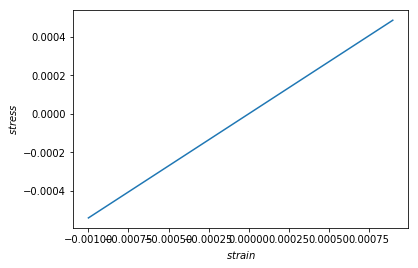

Shear Modulus: 86.36162590172717 GPa


In [52]:
x=3.6
cu = bulk("Cu", "fcc", a=x, cubic=True) 
cu.set_calculator(calc)
cell = cu.get_cell()
basestress = cu.get_stress(voigt=False)

strains = [i for i in np.arange(-0.001,0.001,0.0001)]
stresses = [0]*len(strains)

for i in range(len(strains)):
    cell[0][1] = strains[i]*x
    cu.set_cell(cell, scale_atoms=True)
    stresses[i] = (cu.get_stress(voigt=False)-basestress)[0][1]
    
plt.plot(strains, stresses)
plt.xlabel('$strain$')
plt.ylabel('$stress$')
plt.show()

Gmoduli = [0]*(len(strains)-1)

Gmodulustot = 0
for i in range(len(Gmoduli)):
    Gmoduli[i] = (stresses[i+1]-stresses[i])/(strains[i+1]-strains[i])
    Gmodulustot += Gmoduli[i]

Gmodulus = Gmodulustot/len(Gmoduli)

print('Shear Modulus:', Gmodulus/ kJ * 1.0e24, 'GPa')

In [89]:
x=3.6
cu = bulk("Cu", "fcc", a=x, cubic=True) 
cu.set_calculator(calc)
cell = cu.get_cell()
basestress = cu.get_stress(voigt=False)

strains = [i for i in np.arange(-0.00105,0.00105,0.0001)]
xstresses = [0]*len(strains)
ystresses = [0]*len(strains)
poissons = [0]*len(strains)
poissonstot = 0

for i in range(len(strains)):
    cell[0][0] = (1+strains[i])*x
    cu.set_cell(cell, scale_atoms=True)
    xstresses[i] = (cu.get_stress(voigt=False)-basestress)[0][0]
    ystresses[i] = (cu.get_stress(voigt=False)-basestress)[1][1]
    poissons[i] = (cu.get_stress(voigt=False)-basestress)[1][1]/(2*(cu.get_stress(voigt=False)-basestress)[0][0])
    poissonstot += (cu.get_stress(voigt=False)-basestress)[1][1]/(2*(cu.get_stress(voigt=False)-basestress)[0][0])
    
poisson = poissonstot/len(poissons)

print('Poisson Ratio:', poisson)

Poisson Ratio: 0.3047081008117787


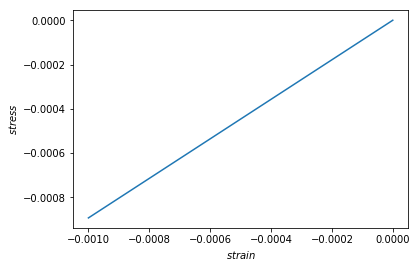

Elastic Modulus: 142.99042697171117 GPa


In [66]:
x=3.6
cu = bulk("Cu", "fcc", a=x, cubic=True) 
cu.set_calculator(calc)
cell = cu.get_cell()
basestress = cu.get_stress(voigt=False)

strains = [i for i in np.arange(-0.001,0.001,0.0001)]
stresses = [0]*len(strains)

for i in range(len(strains)):
    cell[0][0] = (1+strains[i])*x
    cu.set_cell(cell, scale_atoms=True)
    stresses[i] = (cu.get_stress(voigt=False)-basestress)[0][0]

plt.plot(strains, stresses)
plt.xlabel('$strain$')
plt.ylabel('$stress$')
plt.show()

Emoduli = [0]*(len(strains)-1)

Emodulustot = 0
for i in range(len(Emoduli)):
    Emoduli[i] = (stresses[i+1]-stresses[i])/(strains[i+1]-strains[i])
    Emodulustot += Emoduli[i]

Emodulus = Emodulustot/len(Emoduli)

print('Elastic Modulus:', Emodulus/ kJ * 1.0e24, 'GPa')

In [73]:
cu = bulk("Cu", "fcc", a=3.6, cubic=True) 
cu.set_calculator(calc)
cell = cu.get_cell()
volumes = []
pressures =[]

for i in range (100):
    cell *= 1+((i-50)/1000)
    cu.set_cell(cell, scale_atoms=True)
    volumes.append(cu.get_cell()[0][0]**3)
    pressures.append(-np.trace(cu.get_stress(voigt=False))/3)
    cell *= 1/(1+((i-50)/1000))
k = [0]*(len(volumes)-1)
ktot = 0
for i in range(len(k)):    
    vdpbydv = ((volumes[i]+volumes[i+1])/2)*(pressures[i+1]-pressures[i])/(volumes[i+1]-volumes[i])
    ktot-=vdpbydv
    k[i] = - vdpbydv

Kmodulus = (ktot/len(k)) 

print('Bulk Modulus:', Kmodulus/ kJ * 1.0e24, 'GPa')

Bulk Modulus: 118.73838160731367 GPa


In [109]:
poisson2 = 0.5*(1-((Emodulus)/(3*Kmodulus)))
print('Poisson Ratio:', poisson2)
Gmodulus2 = Emodulus/(2*(1+poisson2))
print('Shear Modulus:', Gmodulus2/ kJ * 1.0e24, 'GPa')


Poisson Ratio: 0.29929204435821094
Shear Modulus: 55.026284349467296 GPa


In [114]:
Kreal = 123
Greal = 45
Ereal = 117
Preal = 0.33
print('Actual Bulk Modulus:', Kreal,'GPa')
print('Actual Shear Modulus:', Greal,'GPa')
print('Actual Elastic Modulus:', Ereal,'GPa')
print('Actual Poisson Ratio:', Preal)
print('')
print('Computed Bulk Modulus:', round(Kmodulus/ kJ * 1.0e24,1),'GPa')
print('Error:',round(100*abs((Kmodulus/ kJ * 1.0e24)-Kreal)/Kreal,1),'%')
print('')
print('Computed Shear Modulus:', round(Gmodulus/ kJ * 1.0e24,1),'GPa')
print('Error:',100*round(abs((Gmodulus/ kJ * 1.0e24)-Greal)/Greal,3),'%')
print('')
print('Computed Elastic Modulus:', round(Emodulus/ kJ * 1.0e24,1),'GPa')
print('Error:',100*round(abs((Emodulus/ kJ * 1.0e24)-Ereal)/Ereal,3),'%')
print('')
print('Computed Poisson Ratio:', round(poisson,3))
print('Error:',100*round(abs((poisson)-Preal)/Preal,3),'%')
print('')
print('Calculated (from E,K) Shear Modulus:', round(Gmodulus2/ kJ * 1.0e24,1),'GPa')
print('Error:',100*round(abs((Gmodulus2/ kJ * 1.0e24)-Greal)/Greal,3),'%')
print('')
print('Calculated (from E,K) Poisson Ratio:', round(poisson2,3))
print('Error:',100*round(abs((poisson2)-Preal)/Preal,3),'%')

Actual Bulk Modulus: 123 GPa
Actual Shear Modulus: 45 GPa
Actual Elastic Modulus: 117 GPa
Actual Poisson Ratio: 0.33

Computed Bulk Modulus: 118.7 GPa
Error: 3.5 %

Computed Shear Modulus: 86.4 GPa
Error: 91.9 %

Computed Elastic Modulus: 143.0 GPa
Error: 22.2 %

Computed Poisson Ratio: 0.305
Error: 7.7 %

Calculated (from E,K) Shear Modulus: 55.0 GPa
Error: 22.3 %

Calculated (from E,K) Poisson Ratio: 0.299
Error: 9.3 %
